In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report
from tqdm import tqdm_notebook as tqdm

In [2]:
df=pd.read_csv('Amazon Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
## print the Number of Reviews
print("Number of reviews:",len(df))

Number of reviews: 568454


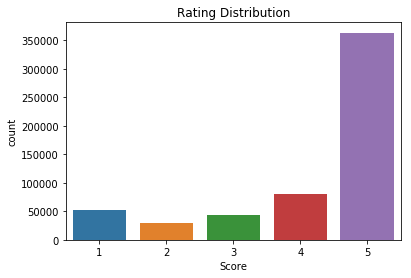

In [4]:
## Rating Distribution
ax = plt.axes()
sns.countplot(df.Score,ax=ax)
ax.set_title('Rating Distribution')
plt.show()

In [5]:
## Number of Unique Count in Ratings
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [6]:
#Deleting all the duplicates having the same userID, Profile, NameTime and Text all in the same column.
df1 =  df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first")
df1=df1.reset_index(drop=True)

In [7]:
size_diff = df1['Id'].size/df['Id'].size
print("%.1f %% reduction in data after deleting duplicates"%((1-size_diff)*100))
print("Size of data",df1['Id'].size," rows ")

30.7 % reduction in data after deleting duplicates
Size of data 393933  rows 


In [8]:
## Working on positive and negeative reviews
df_positive=df1.loc[df.Score>3,'Text']
df_negeative=df1.loc[df.Score<=3,'Text']
print('Number of positive reviews-->',len(df_positive),'\nNumber of negative reviews-->',len(df_negeative))

Number of positive reviews--> 306850 
Number of negative reviews--> 87083


In [9]:
df1['Review_label']= np.where(df1['Score']>3, 1, 0)
df1['Review_label'].head()

0    1
1    0
2    1
3    0
4    1
Name: Review_label, dtype: int64

In [10]:
len(df1)

393933

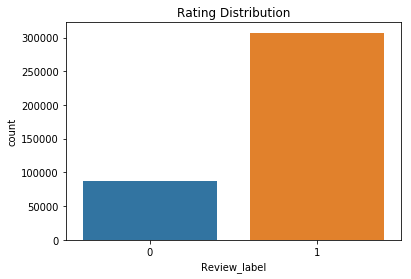

In [11]:
##negative vs positive 
ax = plt.axes()
sns.countplot(df1.Review_label,ax=ax)
ax.set_title('Rating Distribution')
plt.show()

In [12]:
postive_review_words=0
negative_review_words=0
for i in range(len(df1)):
    if df1['Review_label'][i]=='1':
        postive_review_words=postive_review_words+len(df1['Text'][i])
    else:
        negative_review_words=negative_review_words+len(df1['Text'][i])
print('Total Number of Words in Positive Reviews-->',postive_review_words,'\nTotal Number of Words in Positive Reviews-->', negative_review_words)

Total Number of Words in Positive Reviews--> 0 
Total Number of Words in Positive Reviews--> 171086878


In [13]:
## Length of First Sentence
len(df1['Text'][0])

263

In [14]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Review_label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


### Data Pre-processing

### Punctuations and Emoticons

In [15]:
import os
import re

In [16]:
## Data Cleansing
## Removing Punctuation and Lower-Case all the strings
processed_docs_train_Punc=[]
def remove_punc(text):
    
######  A
    text = re.sub(r"aren't", "arent", text.lower())
    
######  C
    text = re.sub(r"can't", "cant", text)
    text = re.sub(r"cant", "cant", text)
    text = re.sub(r"could't", "couldnt", text)
    
######  D
    text = re.sub(r"don't", "dont", text)
    text = re.sub(r"doesn't", "doesnt", text)
    text = re.sub(r"didn't", "didnt", text) 
######  H
    
    text = re.sub(r"haven't", "havent", text)
    text = re.sub(r"hasn't", "hasnt", text)
    text = re.sub(r"hadn't", "hadnt", text)

######  I    
    text = re.sub(r"isn't", "isnt", text)
    
######  M
    text = re.sub(r"mightn't", "mightnt", text)
    text = re.sub(r"mustn't", "mustnt", text)
    

######  N    
    text = re.sub(r"needn't", "neednt", text)
    
######  S
    text = re.sub(r"should't", "shouldnt", text) 
    text = re.sub(r"shouldn't", "shouldnt", text)
    text = re.sub(r"shan't", "shant", text)

######  W
    text = re.sub(r"wouldn't", "wouldnt ", text)
    text = re.sub(r"weren't", "werent", text)
    text = re.sub(r"won't", "wont", text)
    text = re.sub(r"wasn't", "wasnt", text)
        
    #text=re.sub(r"nor","not",text)
    
    #text=re.sub(r"nee","not",text)
    #text=re.sub(r"nie","no",text)
    #text=re.sub(r"na","no",text)
    #text=re.sub(r"ad","and",text)
    text=re.sub(r"com"," ",text)
    text=re.sub(r"www"," ",text)
    text=re.sub(r"http"," ",text)
    text=re.sub(r"href"," ",text)
    text=re.sub(r"br"," ",text)
    ### Drop the Images
    text = re.sub(r"image:[a-zA-Z0-9]*\.jpg", " ", text)
    text = re.sub(r"image:[a-zA-Z0-9]*\.png", " ", text)
    text = re.sub(r"image:[a-zA-Z0-9]*\.gif", " ", text)
    text = re.sub(r"image:[a-zA-Z0-9]*\.bmp", " ", text)
     # Drop css
    text = re.sub(r"#([A-Fa-f0-9]{6}|[A-Fa-f0-9]{3})", " ",text)
    text = re.sub(r"\{\|[^\}]*\|\}", " ", text)
    # Clean templates
    text = re.sub(r"\[?\[user:.*\]", " ", text)
    text = re.sub(r"\[?\[user:.*\|", " ", text)        
    text = re.sub(r"\[?\[wikipedia:.*\]", " ", text)
    text = re.sub(r"\[?\[wikipedia:.*\|", " ", text)
    text = re.sub(r"\[?\[special:.*\]", " ", text)
    text = re.sub(r"\[?\[special:.*\|", " ", text)
    text = re.sub(r"\[?\[category:.*\]", " ", text)
    text = re.sub(r"\[?\[category:.*\|", " ", text)
    text = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", "", text)
    text = re.sub(r"(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)){3}", "", text)
    text=re.sub(r"[^a-zA-Z0-9]+",' ',text)
    text = re.sub(r'[0-9]+', '', text)
    text=re.sub(r'<[^>]+>','',text)
    return text.lower()
df1['Text'] = [remove_punc(df1['Text'][x]) for x in range(len(df1))]

### Finding the Length of first paragraph after removing Punctuation
print(('Finding the Length of first paragraph after removing Punctuation-->'),len(df1['Text'][0]))

Finding the Length of first paragraph after removing Punctuation--> 259


In [17]:
df1['Text'][99]

'the mouth says how do i love thee let me count the ways if you like apple products a must have item the only draw back shipping cost these are very heavy '

In [18]:
### Removing Emoticons
def remove_emo(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df1['Text']  = [remove_emo(df1['Text'][x]) for x in range(len(df1))]

print(('Finding the Length of first paragraph after removing Emoticons-->'),len(df['Text'][0]))

Finding the Length of first paragraph after removing Emoticons--> 263


### Stop-Words

In [19]:
stop_words=['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are','as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 
'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have','having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me','more', 'most','my', 'myself', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 
 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'so', 'some', 
 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 
 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was','we', 'were','what', 
 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 
 'will', 'with', 'won','y', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 
 'yourself', 'yourselves', 'like']
### Removing not,no,nie
print(len(stop_words))

143


In [20]:
## Converting it into lists
raw_docs_train = df1['Text'] .tolist()
print('Length of raw_docs_train Should be equal to 393933 =',len(raw_docs_train))

Length of raw_docs_train Should be equal to 393933 = 393933


In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
## Removal of Stop Words
processed_docs_train_SW = []
for w in tqdm(range(len(raw_docs_train))):
    tokenizer=nltk.word_tokenize(raw_docs_train[w])
    filtered = [word for word in tokenizer if word not in stop_words]     
    processed_docs_train_SW.append(filtered)

print(('Finding the Length of first paragraph after removing Stop-Words-->'),(len(processed_docs_train_SW[0])))
print('Length of dataset',len(processed_docs_train_SW))


Finding the Length of first paragraph after removing Stop-Words--> 23
Length of dataset 393933


In [23]:
## Dictionay of unique Words
words={}
for wds in tqdm(range(len(processed_docs_train_SW))):
    for w in processed_docs_train_SW[wds]:
        if w in words:
            words[w]=words[w]+1
        else:
            words[w]=1


In [24]:
print('Total Number of Words in a Dictionary after Removing Stop-Words-->',sum(words.values()))

Total Number of Words in a Dictionary after Removing Stop-Words--> 15842740


In [25]:
#b = dict( (key, value) for (key, value) in a.items() if key == "hello" )
sorted_words_dict=dict(sorted(words.items(), key=lambda kv: kv[0]))

### lemmatization

In [26]:
from nltk.stem import WordNetLemmatizer
#import the nltk package
import nltk
#call the nltk downloader
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
processed_docs_train_Lemz=[]
for w in tqdm(range(len(processed_docs_train_SW))):
    lemmatization=[wordnet_lemmatizer.lemmatize(word) for word in processed_docs_train_SW[w] ]
    #processed_docs_train_Lemz.append(" ".join(lemmatization))
    processed_docs_train_Lemz.append(lemmatization)

#print("Length of Dataset after lemmatization is-->",len(processed_docs_train_Lemz))

In [28]:
## Dictionay of unique Words
words={}
for wds in tqdm(range(len(processed_docs_train_Lemz))):
    for w in processed_docs_train_Lemz[wds]:
        if w in words:
            words[w]=words[w]+1
        else:
            words[w]=1

In [29]:
sorted_words_dict=dict(sorted(words.items(), key=lambda kv: kv[0]))

In [30]:
## 73311--v < 5
## 28440--v > 5
## 576 len(k) <3 and k!='no'
## 4000 len(k) <4 and (k!='no' and k!='not' and k!='nor'          #######   
dump_words_1=([k for (k,v) in sorted_words_dict.items() if len(k) <4 and (k!='no' and k!='not' and k!='nor' and k!='bad')])
dump_words_2=([k for (k,v) in sorted_words_dict.items() if len(k) <5 and v<6])
dump_words = sorted(dump_words_1+dump_words_2)
print('Length of Dump Words_1==',len(dump_words_1),'\nLength of Dump Words_2==',len(dump_words_2),'\nLength of Dump Words  ==',len(dump_words))

Length of Dump Words_1== 3969 
Length of Dump Words_2== 7401 
Length of Dump Words  == 11370


In [31]:
print('Warning::: Dont Run this code use imported code')
### removing all three letter words  
### I already saved this code in pickle so I am not going to run this code again as it takes 1.30 hrs
#train_text=[]
#for w in tqdm(range(len(processed_docs_train_Lemz))):
#    filtered = [word for word in processed_docs_train_Lemz[w] if word not in dump_words] 
#    train_text.append(filtered)

In [32]:
print('Unloading the train_test case')
import pickle
##saving the file
filename = 'train_text.sav'
#pickle.dump(train_text, open(filename, 'wb'))
# load the model from disk
train_text = pickle.load(open(filename, 'rb'))

Unloading the train_test case


In [33]:
sentence_length=[]
for i in range(len(train_text)):
    sentence_length.append(len(train_text[i]))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

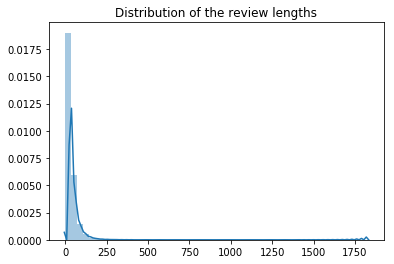

In [34]:
ax = plt.axes()
sns.distplot(sentence_length)
ax.set_title("Distribution of the review lengths")
plt.plot()

In [35]:
words={}
for wds in tqdm(range(len(train_text))):
    for w in train_text[wds]:
        if w in words:
            words[w]=words[w]+1
        else:
            words[w]=1
sorted_words_dict=dict(sorted(words.items(), key=lambda kv: kv[0]))

In [36]:
print('--------------------------Pre-Processening Completed-------------------------------------')

--------------------------Pre-Processening Completed-------------------------------------


### Building own Word2VEC

In [37]:
from gensim.models import Word2Vec

In [38]:
model = Word2Vec(train_text, size=248, window=5, min_count=5, workers=16, sg=0, negative=5)

In [39]:
word_vectors = model.wv
del model

In [40]:
print("Number of word vectors: {}".format(len(word_vectors.vocab)))

Number of word vectors: 29160


In [41]:
w1 = ["cool"]
word_vectors.wv.most_similar (positive=w1)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chill', 0.5955677032470703),
 ('cooler', 0.5881722569465637),
 ('warm', 0.5701600313186646),
 ('warmer', 0.5271965265274048),
 ('cooled', 0.5109188556671143),
 ('chilled', 0.5080674886703491),
 ('fridge', 0.5045033693313599),
 ('cooling', 0.5030217170715332),
 ('refrigerator', 0.49794474244117737),
 ('frig', 0.48134157061576843)]

In [42]:
w1 = ["like"]
word_vectors.wv.most_similar (positive=w1)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('enjoys', 0.7670320272445679),
 ('prefers', 0.7539985179901123),
 ('love', 0.6122958064079285),
 ('eats', 0.5677140355110168),
 ('liked', 0.5570693016052246),
 ('agrees', 0.5501819252967834),
 ('enjoy', 0.4763859808444977),
 ('dislike', 0.47622913122177124),
 ('adores', 0.4584408402442932),
 ('asks', 0.4556182622909546)]

In [43]:
w1 = ["not"]
word_vectors.wv.most_similar (positive=w1)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('isnt', 0.6981830596923828),
 ('arent', 0.6466144919395447),
 ('wasnt', 0.6377353668212891),
 ('werent', 0.5384491682052612),
 ('dont', 0.509763240814209),
 ('doesnt', 0.5070368051528931),
 ('didnt', 0.48687857389450073),
 ('neither', 0.4595584273338318),
 ('wouldnt', 0.45221439003944397),
 ('shouldnt', 0.4410492777824402)]

### Word Embedding

In [44]:
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200

In [45]:
#word2index={MAX_NB_WORDS[i]:i for i in range(0,len(MAX_NB_WORDS))}
#print(word_vectors.vocab)

In [46]:
'bought' in word_vectors.vocab.keys()

True

In [47]:
merge_list=[]
for k,v in enumerate(word_vectors.vocab):
    merge_list.append(v)
merge_list=sorted(merge_list)

In [48]:
#Dictionary with Words2Indexing
word2index={merge_list[i]:i+1 for i in range(0,len(merge_list))}
##Index2Words
Index2Words = dict((v,k) for k,v in word2index.items())

In [49]:
print('Warning:: Please dont run below query I already saved corpus through pickle')
#corpus=[]
#for w in tqdm(range(len(train_text))):
#    filtered = [word for word in train_text[w] if word in merge_list] 
#    corpus.append(filtered)

In [50]:
### Saving the corpus inside pickle
print('Unpacking corpus')
import pickle
##saving the file
filename = 'corpus.sav'
#pickle.dump(corpus, open(filename, 'wb'))
# load the model from disk
corpus = pickle.load(open(filename, 'rb'))

Unpacking corpus


In [51]:
text=[]
for i in tqdm(range(len(corpus))):
    text.append([])
    for xx in corpus[i]:
        text[i].append(xx.replace(xx,str(word2index[xx])))
        
print('Integer Data',text[5],'\nCharater Data',corpus[5]) 


Integer Data ['28535', '11319', '25506', '17661', '9384', '19567', '25506', '8241', '15248', '9467', '28189', '21927', '2184', '15642', '18597', '10927', '19105', '16445', '2620', '14432', '9471', '18943', '17098', '18320', '9115', '12250', '14175', '28260', '28791', '15667', '25506', '6417', '26613'] 
Charater Data ['wild', 'hair', 'taffy', 'ordered', 'five', 'pound', 'taffy', 'enjoyable', 'many', 'flavor', 'watermelon', 'root', 'beer', 'melon', 'peppermint', 'grape', 'plaint', 'much', 'black', 'licorice', 'flavored', 'piece', 'not', 'particular', 'favorite', 'husband', 'lasted', 'week', 'would', 'mend', 'taffy', 'delightful', 'treat']


In [52]:
print('Integer Data',text[2],'\nCharater Data',corpus[2]) 

Integer Data ['5005', '1317', '3956', '14463', '18984', '4562', '10373', '3789', '9274', '26256', '24340', '14412', '4766', '19582', '25039', '26256', '16419', '11660', '17098', '4239', '9474', '11829', '15667', '29052', '26613', '9004', '24719', '14401', '14569', '28649', '28118', '26613', '7889', '22747', '23366', '28649'] 
Charater Data ['confection', 'around', 'century', 'light', 'pillowy', 'citrus', 'gelatin', 'case', 'filbert', 'tiny', 'square', 'liberally', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'not', 'chewy', 'flavorful', 'highly', 'mend', 'yummy', 'treat', 'familiar', 'story', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'edmund', 'selling', 'sister', 'witch']


### Word Embedding

In [53]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [54]:
MAX_SEQUENCE_LENGTH=200
data = pad_sequences(text, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")

In [55]:
print('Shape of the data-->',data.shape)

Shape of the data--> (393933, 200)


### Train Test Split

In [56]:
y=df1['Review_label']

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,y, test_size=0.33, random_state=123)

In [58]:
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (263935, 200)
Number transactions y_train dataset:  (263935,)
Number transactions X_test dataset:  (129998, 200)
Number transactions y_test dataset:  (129998,)


### Building LSTM without Oversampling

In [59]:
from keras.layers import Dense, Input,CuDNNLSTM, Embedding, Dropout,SpatialDropout1D, Bidirectional
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization


In [60]:
wv_matrix=word_vectors.wv.vectors
nb_words=len(word_vectors.wv.vocab) ## Number of Unique Words present in corpus
WV_DIM=word_vectors.wv.vector_size ## Size of a Window
MAX_SEQUENCE_LENGTH=len(data[0])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
wv_layer = Embedding(nb_words,
                     WV_DIM,
                     mask_zero=False,
                     weights=[wv_matrix],
                     input_length=MAX_SEQUENCE_LENGTH,
                     trainable=False)

In [62]:
# Inputs
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = wv_layer(comment_input)

In [63]:
# LSTM
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
x = Bidirectional(CuDNNLSTM(64, return_sequences=False))(embedded_sequences)

In [64]:
# Output
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(1, activation='hard_sigmoid')(x)

In [65]:
# build the model
model_wos = Model(inputs=[comment_input], outputs=preds)
model_wos.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001, clipnorm=.25, beta_1=0.7, beta_2=0.99),
             metrics=['accuracy'])

In [66]:
hist_wos = model_wos.fit([x_train], y_train, validation_split=0.15,
                 epochs=100, batch_size=256, shuffle=True)

Train on 224344 samples, validate on 39591 samples
Epoch 1/100
224344/224344 [==============================] - 87s 390us/step - loss: 0.5471 - acc: 0.7736 - val_loss: 0.5749 - val_acc: 0.7903
Epoch 2/100
224344/224344 [==============================] - 85s 381us/step - loss: 0.4576 - acc: 0.8128 - val_loss: 0.4515 - val_acc: 0.8114
Epoch 3/100
224344/224344 [==============================] - 86s 382us/step - loss: 0.4406 - acc: 0.8234 - val_loss: 0.4214 - val_acc: 0.8252
Epoch 4/100
224344/224344 [==============================] - 86s 383us/step - loss: 0.4284 - acc: 0.8317 - val_loss: 0.4419 - val_acc: 0.8328
Epoch 5/100
224344/224344 [==============================] - 85s 380us/step - loss: 0.4219 - acc: 0.8365 - val_loss: 0.4295 - val_acc: 0.8446
Epoch 6/100
224344/224344 [==============================] - 86s 382us/step - loss: 0.4129 - acc: 0.8419 - val_loss: 0.4064 - val_acc: 0.8392
Epoch 7/100
224344/224344 [==============================] - 87s 386us/step - loss: 0.4031 - acc:

Epoch 58/100
224344/224344 [==============================] - 87s 386us/step - loss: 0.3259 - acc: 0.8972 - val_loss: 0.5404 - val_acc: 0.8733
Epoch 59/100
224344/224344 [==============================] - 86s 381us/step - loss: 0.3237 - acc: 0.8978 - val_loss: 0.6150 - val_acc: 0.8753
Epoch 60/100
224344/224344 [==============================] - 86s 384us/step - loss: 0.3198 - acc: 0.8993 - val_loss: 0.5511 - val_acc: 0.8724
Epoch 61/100
224344/224344 [==============================] - 86s 381us/step - loss: 0.3212 - acc: 0.8991 - val_loss: 0.6078 - val_acc: 0.8742
Epoch 62/100
224344/224344 [==============================] - 86s 383us/step - loss: 0.3238 - acc: 0.9000 - val_loss: 0.5920 - val_acc: 0.8743
Epoch 63/100
224344/224344 [==============================] - 87s 387us/step - loss: 0.3176 - acc: 0.9002 - val_loss: 0.5827 - val_acc: 0.8711
Epoch 64/100
224344/224344 [==============================] - 86s 385us/step - loss: 0.3194 - acc: 0.9013 - val_loss: 0.5572 - val_acc: 0.8692

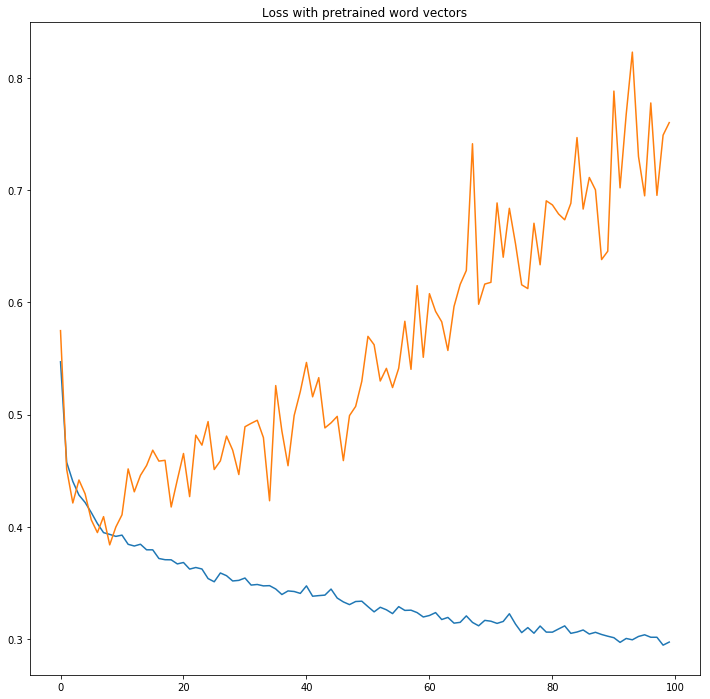

In [67]:
history = pd.DataFrame(hist_wos.history)
plt.figure(figsize=(12,12));
plt.plot(history["loss"]);
plt.plot(history["val_loss"]);
plt.title("Loss with pretrained word vectors");
plt.show();

In [68]:
y_pred=model_wos.predict(x_test)

In [73]:
y_pred[0:10]

array([[0.       ],
       [1.       ],
       [0.5034421],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.9249657],
       [0.8012835],
       [0.       ],
       [1.       ]], dtype=float32)

In [100]:
## prediction of classes
pred_class=[]
for i in range(len(y_pred)):
    if y_pred[i]>=.5:
        pred_class.append(1)
    else:
        pred_class.append(0)
        

In [101]:
pred_class[0:10]

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1]

In [102]:
from sklearn.metrics import accuracy_score
print('Accuracy on Test data-set',accuracy_score(y_test, pred_class)*100)

Accuracy on Test data-set 87.11518638748288


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68     28828
           1       0.90      0.95      0.92    101170

   micro avg       0.87      0.87      0.87    129998
   macro avg       0.83      0.78      0.80    129998
weighted avg       0.87      0.87      0.87    129998



In [104]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred_class)
cm

array([[17631, 11197],
       [ 5553, 95617]])

In [98]:
from sklearn.metrics import roc_curve
y_pred_keras = model_wos.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

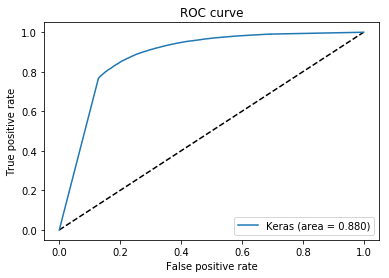

In [105]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### Building LSTM with Oversampling or Using SMOTE

In [106]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 205886
Before OverSampling, counts of label '0': 58049


In [107]:
from imblearn.over_sampling import SMOTE

In [ ]:
#sm = SMOTE(random_state=124)
#x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

In [119]:
### Saving the corpus inside pickle
print('Unpacking x_train_res')

##saving the file
filename = 'x_train_res.sav'
#pickle.dump(x_train_res, open(filename, 'wb'))
# load the model from disk
x_train_res = pickle.load(open(filename, 'rb'))

Unpacking x_train_res


In [120]:
### Saving the corpus inside pickle
print('Unpacking y_train_res')

##saving the file
filename = 'y_train_res.sav'
#pickle.dump(y_train_res, open(filename, 'wb'))
# load the model from disk
y_train_res = pickle.load(open(filename, 'rb'))

Unpacking y_train_res


In [121]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (411772, 200)
After OverSampling, the shape of train_y: (411772,) 

After OverSampling, counts of label '1': 205886
After OverSampling, counts of label '0': 205886


In [122]:
wv_matrix=word_vectors.wv.vectors
nb_words=len(word_vectors.wv.vocab) ## Number of Unique Words present in corpus
WV_DIM=word_vectors.wv.vector_size ## Size of a Window
MAX_SEQUENCE_LENGTH=len(data[0])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
wv_layer = Embedding(nb_words,WV_DIM,mask_zero=False,weights=[wv_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)

In [124]:
# Inputs
comment_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = wv_layer(comment_input)

In [125]:
#LSTM
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)
x = Bidirectional(CuDNNLSTM(128, return_sequences=False))(embedded_sequences)

In [126]:
# Output
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
preds = Dense(1, activation='hard_sigmoid')(x)

In [127]:
# build the model
model_os = Model(inputs=[comment_input], outputs=preds)
model_os.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001, clipnorm=.25, beta_1=0.7, beta_2=0.99),
              metrics=['accuracy'])

In [128]:
hist_os = model_os.fit([x_train_res], y_train_res, validation_split=0.15,epochs=100, batch_size=256, shuffle=True)

Train on 350006 samples, validate on 61766 samples
Epoch 1/100
350006/350006 [==============================] - 195s 558us/step - loss: 0.5378 - acc: 0.7881 - val_loss: 0.0924 - val_acc: 0.9734
Epoch 2/100
350006/350006 [==============================] - 194s 554us/step - loss: 0.4172 - acc: 0.8426 - val_loss: 0.0605 - val_acc: 0.9881
Epoch 3/100
350006/350006 [==============================] - 193s 551us/step - loss: 0.3916 - acc: 0.8571 - val_loss: 0.0326 - val_acc: 0.9904
Epoch 4/100
350006/350006 [==============================] - 193s 551us/step - loss: 0.3766 - acc: 0.8658 - val_loss: 0.0448 - val_acc: 0.9865
Epoch 5/100
350006/350006 [==============================] - 193s 553us/step - loss: 0.3644 - acc: 0.8730 - val_loss: 0.0283 - val_acc: 0.9937
Epoch 6/100
350006/350006 [==============================] - 193s 550us/step - loss: 0.3529 - acc: 0.8781 - val_loss: 0.0284 - val_acc: 0.9923
Epoch 7/100
350006/350006 [==============================] - 192s 550us/step - loss: 0.3503

350006/350006 [==============================] - 192s 548us/step - loss: 0.2329 - acc: 0.9468 - val_loss: 0.0306 - val_acc: 0.9947
Epoch 58/100
350006/350006 [==============================] - 193s 553us/step - loss: 0.2291 - acc: 0.9475 - val_loss: 0.0262 - val_acc: 0.9955
Epoch 59/100
350006/350006 [==============================] - 195s 557us/step - loss: 0.2287 - acc: 0.9474 - val_loss: 0.0451 - val_acc: 0.9920
Epoch 60/100
350006/350006 [==============================] - 194s 555us/step - loss: 0.2268 - acc: 0.9480 - val_loss: 0.0303 - val_acc: 0.9947
Epoch 61/100
350006/350006 [==============================] - 195s 558us/step - loss: 0.2332 - acc: 0.9485 - val_loss: 0.0309 - val_acc: 0.9942
Epoch 62/100
350006/350006 [==============================] - 193s 551us/step - loss: 0.2301 - acc: 0.9488 - val_loss: 0.0313 - val_acc: 0.9938
Epoch 63/100
350006/350006 [==============================] - 194s 554us/step - loss: 0.2260 - acc: 0.9496 - val_loss: 0.0422 - val_acc: 0.9913
Epoch

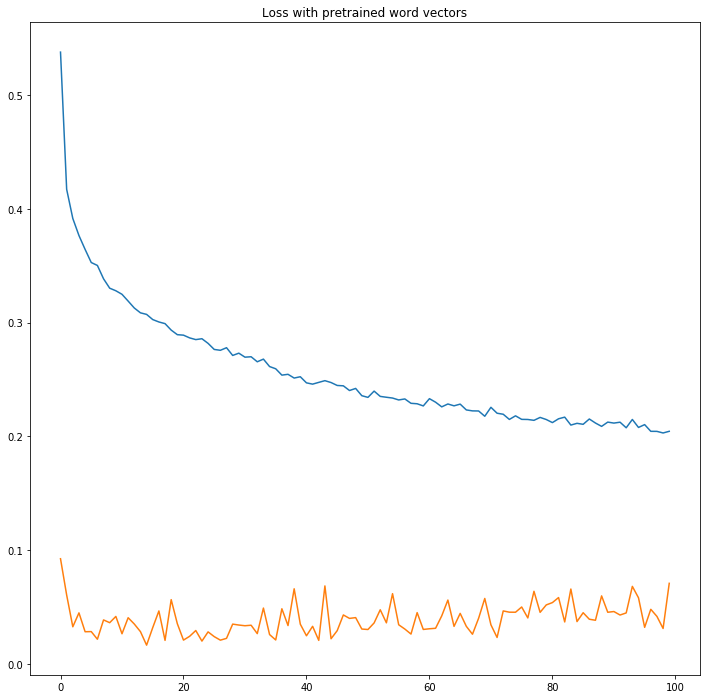

In [129]:
history = pd.DataFrame(hist_os.history)
plt.figure(figsize=(12,12));
plt.plot(history["loss"]);
plt.plot(history["val_loss"]);
plt.title("Loss with pretrained word vectors");
plt.show();

In [130]:
y_train_res

array([1, 1, 1, ..., 0, 0, 0])

In [131]:
y_pred_os=model_os.predict(x_test)

In [132]:
y_pred_os

array([[0.       ],
       [1.       ],
       [0.6929768],
       ...,
       [1.       ],
       [1.       ],
       [0.       ]], dtype=float32)

In [144]:
## prediction of classes
pred_class_os=[]
for i in range(len(y_pred_os)):
    if y_pred_os[i]>=.5:
        pred_class_os.append(1)
    else:
        pred_class_os.append(0)

pred_class_os[0:10]

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1]

In [145]:
from sklearn.metrics import accuracy_score
print('Accuracy on Test data-set',accuracy_score(y_test, pred_class_os)*100)

Accuracy on Test data-set 86.23594209141679


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_class_os))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67     28828
           1       0.90      0.93      0.91    101170

   micro avg       0.86      0.86      0.86    129998
   macro avg       0.81      0.78      0.79    129998
weighted avg       0.86      0.86      0.86    129998



In [147]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred_class_os)
cm


array([[17930, 10898],
       [ 6995, 94175]])

In [148]:
from sklearn.metrics import roc_curve
y_pred_keras = model_os.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

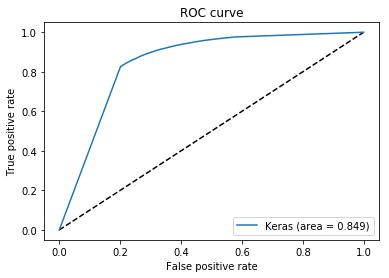

In [149]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()